# Importation des librairies

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fichiers CSV

In [31]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [32]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [33]:
population = pd.read_csv('population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [34]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


# Exploration des types de données

In [35]:
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [36]:
dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [37]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [38]:
sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

# 1. Analyses globales

## 1.1 Proportion de personnes en état de sous-nutrition

Pour calculer cette proporition, on va utiliser les tables "population" et "sous_nutrition", vu que la proportion est calculée à travers la formule :

- Proportion (%) = (nombre de personnes en état de sous-nutrition)*100 / (population)

D'abord, on change le nom de la colonne 'Valeur' de la table sous_nutrition par 'Sous_nutrition' pour la diférencier de la colonne 'Valeur' de la table population :

In [39]:
sous_nutrition.rename(columns={'Valeur':'Sous_nutrition'}, inplace=True)
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Et on change aussi le nom de la colonne 'Valeur' de la table population par 'Population':

In [40]:
population.rename(columns={'Valeur':'Population'}, inplace=True)
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


La colonne 'Sous-nutrition' est du type objet. Il faut la changer par le type float :

In [41]:
sous_nutrition['Sous_nutrition'] = pd.to_numeric(sous_nutrition['Sous_nutrition'])

ValueError: Unable to parse string "<0.1" at position 60

On a un message d'erreur nous disant qu'il y a une valeur "<0.1" à l'index 60 :

In [42]:
print(sous_nutrition.iloc[60,:])

Zone                Arménie
Année             2012-2014
Sous_nutrition         <0.1
Name: 60, dtype: object


On doit retirer le symbole '<'. On va considerer, donc, que cette valeur est égale à 0.

In [43]:
sous_nutrition['Sous_nutrition'] = np.where((sous_nutrition.Sous_nutrition == '<0.1'), 0, sous_nutrition.Sous_nutrition)
print(sous_nutrition.iloc[60,:])

Zone                Arménie
Année             2012-2014
Sous_nutrition            0
Name: 60, dtype: object


Maintenaint on peut changer la colonne 'Sous_nutrition' par le type float. 

In [44]:
sous_nutrition['Sous_nutrition'] = pd.to_numeric(sous_nutrition['Sous_nutrition'])
print(sous_nutrition.dtypes)

Zone               object
Année              object
Sous_nutrition    float64
dtype: object


Et on change l'unité de 'Sous_nutrition' (exprimée millions) en  et 'Population' (exprimée en milliers) :

In [45]:
sous_nutrition['Sous_nutrition'] = sous_nutrition['Sous_nutrition']*1000000
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [46]:
population['Population'] = population['Population']*1000
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


La table sous_nutrition affiche la moyenne des valeurs pour les trois années de la plage de la colonne 'Année'. On peut donc considérer que année = médiane de la plage.

Ainsi :

In [47]:
sous_nutrition.Année.unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [48]:
sous_nutrition.loc[sous_nutrition['Année']== '2012-2014', 'Année'] = 2013
sous_nutrition.loc[sous_nutrition['Année']== '2013-2015', 'Année'] = 2014
sous_nutrition.loc[sous_nutrition['Année']== '2014-2016', 'Année'] = 2015
sous_nutrition.loc[sous_nutrition['Année']== '2015-2017', 'Année'] = 2016
sous_nutrition.loc[sous_nutrition['Année']== '2016-2018', 'Année'] = 2017
sous_nutrition.loc[sous_nutrition['Année']== '2017-2019', 'Année'] = 2018
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


Finalement, on va pouvoir fusionner les deux tables dans une table pop_sous_nut :

In [49]:
pop_sous_nut = pd.merge(population, sous_nutrition, on=['Zone','Année'])
pop_sous_nut.head()

,Zone,Année,Population,Sous_nutrition
0,Afghanistan,2013,32269589.0,8600000.0
1,Afghanistan,2014,33370794.0,8800000.0
2,Afghanistan,2015,34413603.0,8900000.0
3,Afghanistan,2016,35383032.0,9700000.0
4,Afghanistan,2017,36296113.0,10500000.0


On ne veut que les données de 2017 :

In [50]:
pop_sous_nut_2017 = pop_sous_nut.loc[pop_sous_nut['Année']==2017,:].copy()
pop_sous_nut_2017.head()

,Zone,Année,Population,Sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0
10,Afrique du Sud,2017,57009756.0,3100000.0
16,Albanie,2017,2884169.0,100000.0
22,Algérie,2017,41389189.0,1300000.0
28,Allemagne,2017,82658409.0,NaN


On peut calculer la proportion de personnes en état de sous nutrition par pays : 

In [51]:
pop_sous_nut_2017['Proportion_sous_nut'] = round(pop_sous_nut_2017['Sous_nutrition']*100 / pop_sous_nut_2017['Population'],2)
pop_sous_nut_2017.head()

,Zone,Année,Population,Sous_nutrition,Proportion_sous_nut
4,Afghanistan,2017,36296113.0,10500000.0,28.93
10,Afrique du Sud,2017,57009756.0,3100000.0,5.44
16,Albanie,2017,2884169.0,100000.0,3.47
22,Algérie,2017,41389189.0,1300000.0,3.14
28,Allemagne,2017,82658409.0,NaN,NaN


Et la proportion de personnes en état de sous nutrition globalement :

In [54]:
pop_total_2017 = pop_sous_nut_2017['Population'].sum()

sous_total_2017 = pop_sous_nut_2017['Sous_nutrition'].sum()

prop_total_2017 = round(sous_total_2017*100/pop_total_2017,2)

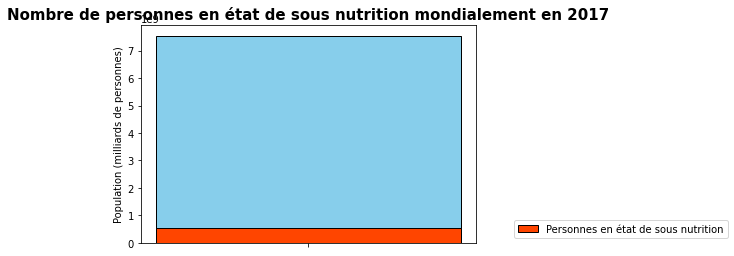

In [461]:
data_graph = ['']
plt.bar(data_graph, pop_total_2017, color = 'skyblue', edgecolor='black')
plt.bar(data_graph, sous_total_2017, color = 'orangered', label = "Personnes en état de sous nutrition", edgecolor='black')
plt.legend(loc="lower left",bbox_to_anchor=(1.1,0))
plt.ylabel("Population (milliards de personnes)")
plt.title("Nombre de personnes en état de sous nutrition mondialement en 2017", fontsize = 15, fontweight = 'bold')
plt.show()

In [415]:
import locale
locale.setlocale(locale.LC_ALL, '')

print("En 2017, la population mondiale était de", '{:,}'.format(pop_total_2017).replace(',', ' '),
      "personnes, dont un total de ", '{:,}'.format(sous_total_2017).replace(',', ' '), "personnes en état de sous nutrition.")

print("Globalement, la proportion de personnes en état de sous nutrition en 2017 est de ", 
      '{:,}'.format(prop_total_2017).replace(',', ' '),"%.")

En 2017, la population mondiale était de 7 543 798 779.0 personnes, dont un total de  535 700 000.0 personnes en état de sous nutrition.
Globalement, la proportion de personnes en état de sous nutrition en 2017 est de  7.1 %.


### Proportion de personnes en état de sous-nutrition en 2017 = 7.1%.

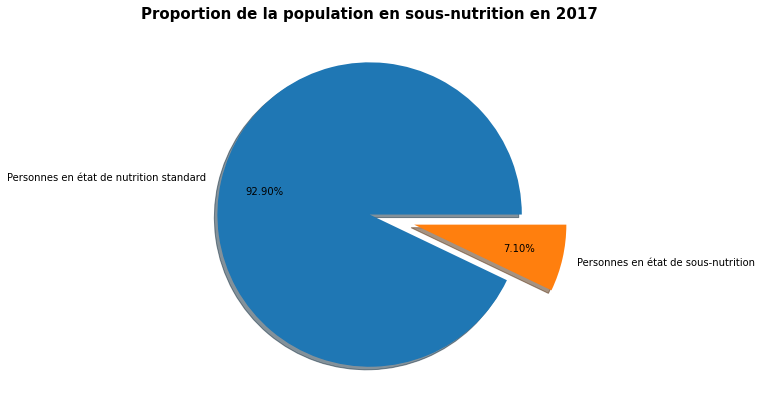

In [518]:
sous_plot = [(pop_total_2017-sous_total_2017), sous_total_2017] 
sous_labels = ['Personnes en état de nutrition standard','Personnes en état de sous-nutrition']
plt.figure(figsize = (7,7))
plt.pie(sous_plot, labels = sous_labels, autopct='%.2f%%',pctdistance=0.71,shadow=True, explode=(0, 0.3))
plt.title('Proportion de la population en sous-nutrition en 2017', fontsize = 15, fontweight ='bold')
plt.show()

## 1.2 Nombre théorique de personnes qui pourraient être nourries

On peut le calculer via la disponibilité alimentaire mondiale et la population mondiale. 

On va utiliser la disponibilité alimentaire en kcal/personne/jour et la multiplier par la population, pour qu'on sache combien de kcal sont disponibles par jour mondialement. Enfin, si on considère qu'une personne a besoin en moyenne de 2000 kcal/jour, on saura combien de personnes peuvent être nourries à travers le calcul :

- Nombre de personnes = (disponibilité alimentaire)*(population) / (2000)

Le fichier disponibilité alimentaire mondiale est pour l'année de 2013, donc utilisera cette année pour nos calculs.

In [64]:
pop_2013 = population.loc[population['Année']==2013,:]
pop_2013.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
6,Afrique du Sud,2013,53687121.0
12,Albanie,2013,2903790.0
18,Algérie,2013,38140133.0
24,Allemagne,2013,81174367.0


On calcule la disponibilité alimentaire en kcal/personne/jour par pays :

In [68]:
dispo_alim_par_pays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
dispo_alim_par_pays.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


Et la population par pays en 2013 :

In [69]:
dispo_personnes = pd.merge(pop_2013, dispo_alim_par_pays, on=['Zone'])
dispo_personnes.head()

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2013,32269589.0,2087.0
1,Afrique du Sud,2013,53687121.0,3020.0
2,Albanie,2013,2903790.0,3188.0
3,Algérie,2013,38140133.0,3293.0
4,Allemagne,2013,81174367.0,3503.0


On peut calculer la population qui pourrait être nourri selon la disponibilité par pays :

In [83]:
dispo_personnes['Pop_nourri']=round(dispo_personnes['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_personnes['Population']/(2000),3)
dispo_personnes.head()

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),Pop_nourri
0,Afghanistan,2013,32269589.0,2087.0,3.367332e+07
1,Afrique du Sud,2013,53687121.0,3020.0,8.106755e+07
2,Albanie,2013,2903790.0,3188.0,4.628641e+06
3,Algérie,2013,38140133.0,3293.0,6.279773e+07
4,Allemagne,2013,81174367.0,3503.0,1.421769e+08


Et, finalement, le nombre de personnes mondialement :

In [84]:
n = dispo_personnes['Pop_nourri'].sum()
print('{:,}'.format(n).replace(',', ' '))

10 022 181 563.948002


### On pourrait nourrir plus de 10 milliards de personnes par jour.

Sachant que la population mondiale totale en 2013 était de :

In [85]:
p = dispo_personnes['Population'].sum()
print('{:,}'.format(p).replace(',', ' '))

6 969 731 998.0


In [533]:
print("On pourrait théoriquement nourrir", '{:,}'.format(round(n-p)).replace(',', ' '),"personnes en plus de ce qu'il il y en avait dans le monde en 2013 selon la disponibilité alimentaire mondiale en kcal par jour.")

On pourrait théoriquement nourrir 3 052 449 566 personnes en plus de ce qu'il il y en avait dans le monde en 2013 selon la disponibilité alimentaire mondiale en kcal par jour.


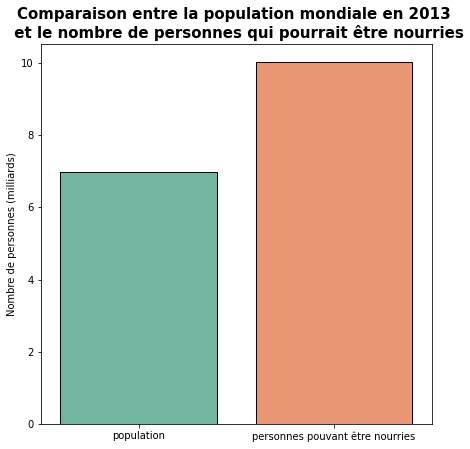

In [519]:
pop_plot = [p/1000000000, n/1000000000]
x_plot = ['population', 'personnes pouvant être nourries']
plt.figure(figsize = (7,7))
sns.barplot(x = x_plot, y = pop_plot, palette = 'Set2', edgecolor='black')
plt.ylabel("Nombre de personnes (milliards)")
plt.title("Comparaison entre la population mondiale en 2013 \n et le nombre de personnes qui pourrait être nourries", 
          fontsize = 15, fontweight = 'bold')
plt.show()

## 1.3. Nombre théorique de personnes qui pourraient être nourries que par des produits végétaux 

Mêmes calculs qu'avant, sauf que cette fois-ci on va filtrer la disponibilité alimentaire en kcal/jour pour des aliments d'origine vegetale.

In [79]:
# dispo par pays et par origine 
dispo_alim_par_pays_origine = dispo_alimentaire.groupby(['Zone','Origine'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
dispo_alim_par_pays_origine.head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,216.0
1,Afghanistan,vegetale,1871.0
2,Afrique du Sud,animale,487.0
3,Afrique du Sud,vegetale,2533.0
4,Albanie,animale,985.0


In [80]:
# dispo par pays, origine vegetale
dispo_vegetale = dispo_alim_par_pays_origine.loc[dispo_alim_par_pays_origine['Origine']=='vegetale',:]
dispo_vegetale.head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,1871.0
3,Afrique du Sud,vegetale,2533.0
5,Albanie,vegetale,2203.0
7,Algérie,vegetale,2915.0
9,Allemagne,vegetale,2461.0


In [81]:
# dispo origine vegetale et population par pays, 2013
dispo_personnes_vege = pd.merge(pop_2013, dispo_vegetale, on=['Zone']).drop(columns=['Origine','Année'])
dispo_personnes_vege.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,32269589.0,1871.0
1,Afrique du Sud,53687121.0,2533.0
2,Albanie,2903790.0,2203.0
3,Algérie,38140133.0,2915.0
4,Allemagne,81174367.0,2461.0


In [82]:
# Population qui pourrait être nourrie, si on considère un besoin de 2000 kcal par personne par jour 
dispo_personnes_vege['Pop_nourri_vege']=round(dispo_personnes_vege['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_personnes_vege['Population']/(2000),3)
dispo_personnes_vege.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),Pop_nourri_vege
0,Afghanistan,32269589.0,1871.0,3.018820e+07
1,Afrique du Sud,53687121.0,2533.0,6.799474e+07
2,Albanie,2903790.0,2203.0,3.198525e+06
3,Algérie,38140133.0,2915.0,5.558924e+07
4,Allemagne,81174367.0,2461.0,9.988506e+07


Nombre théorique de personnes qui pourraient être nourries que par des produits végétaux :

In [87]:
# Nombre total
n_v = dispo_personnes_vege['Pop_nourri_vege'].sum()
print('{:,}'.format(n_v).replace(',', ' '))

8 253 336 951.665999


### Qu'avec des produits végéteaux, on pourrait nourrir plus de 8 milliards de personnes par jour.

In [92]:
print("On pourrait théoriquement nourrir", '{:,}'.format(round((n_v)-p)).replace(',', ' ') ,"personnes en plus de ce qu'il il y en avait dans le monde en 2013 qu'avec des produits d'origine végétale, selon la disponibilité alimentaire en kcal par jour.")

On pourrait théoriquement nourrir 1 283 604 954 personnes en plus de ce qu'il il y en avait dans le monde en 2013 qu'avec des produits d'origine végétale, selon la disponibilité alimentaire en kcal par jour.


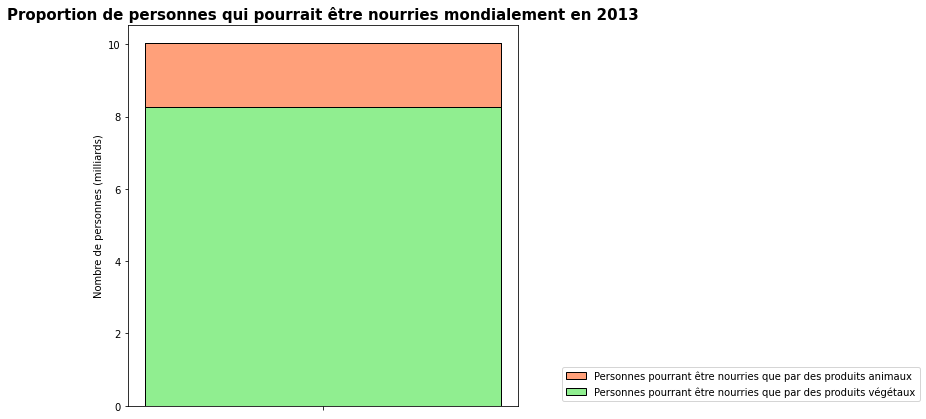

In [532]:
veg_x = ['','']
plt.figure(figsize = (7,7))
plt.bar(veg_x, n/1000000000, color = 'lightsalmon', label = "Personnes pourrant être nourries que par des produits animaux", edgecolor='black')
plt.bar(veg_x, n_v/1000000000, color = 'lightgreen', label = "Personnes pourrant être nourries que par des produits végétaux", edgecolor='black')
plt.legend(loc="lower left",bbox_to_anchor=(1.1,0))
plt.ylabel("Nombre de personnes (milliards)")
plt.title("Proportion de personnes qui pourrait être nourries mondialement en 2013", fontsize = 15, fontweight = 'bold')
plt.show()

## 1.4 Utilisation de la disponibilité intérieure

Selon Julien :
- La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays;
- Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2.

Ce lien logique entre les 10 variables de même mesure (milliers de tonnes) peut être exprimé comme :

- Disponibilité intérieure = Tous ce qu'un pays produit + ce qu'il importe - ce qu'il exporte + ces variations de stock;
- La disponibilité intérieure peut être utilisé pour l'alimentation animale, pour d'autres utilisations, pour nourriture (humaine), pour semences, pour traitement ou peut avoir des pertes.

On sait donc que les colonnes "Aliments pour animaux", "Nourriture" (qui correspond à aliments pour humains) et "Pertes" peuvent être calculés comme un pourcentage de la colonne "Disponibilité intérieure". 

Ainsi, on va regarder la part de la disponibilité intériéure qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

In [ ]:
# Création d'une table plus lisible à lire avec les infos dont on a besoin
dispo_alim_qte = dispo_alimentaire.drop(columns=['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)'])

On peut regarder tels informations par pays, en ajoutant des colonnes "Pourcentage alimentation animale", "Pourcentage perdue" et "Pourcentage Alimentation humaine" à la table Disponibilité Alimentaire.

In [107]:
# Ajout des colonnes "Pourcentage alimentation animale", "Pourcentage perdue" et "Pourcentage Alimentation humaine"
dispo_alim_qte['Pourcentage alimentation animale'] =  round(dispo_alim_qte['Aliments pour animaux']*100/dispo_alim_qte['Disponibilité intérieure'],2)
dispo_alim_qte['Pourcentage perdue'] =  round(dispo_alim_qte['Pertes']*100/dispo_alim_qte['Disponibilité intérieure'],2)
dispo_alim_qte['Pourcentage alimentation humaine'] =  round(dispo_alim_qte['Nourriture']*100/dispo_alim_qte['Disponibilité intérieure'],2)

dispo_alim_qte.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Pourcentage alimentation animale,Pourcentage perdue,Pourcentage alimentation humaine
0,Afghanistan,Abats Comestible,animale,NaN,NaN,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,100.00
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,NaN,4.88,95.12
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00


Et, finalement, les pourcentages totales de la disponibilité intérieure :

In [111]:
# Pourcentage total de l'alimentation pour animaux
pourc_per = round(dispo_alim_qte['Aliments pour animaux'].sum()*100/dispo_alim_qte['Disponibilité intérieure'].sum(),2)
pourc_per

13.24

In [112]:
# Pourcentage total de l'alimentation pour humains
pourc_per = round(dispo_alim_qte['Nourriture'].sum()*100/dispo_alim_qte['Disponibilité intérieure'].sum(),2)
pourc_per

49.51

In [110]:
# Pourcentage total de l'alimentation perdue
pourc_per = round(dispo_alim_qte['Pertes'].sum()*100/dispo_alim_qte['Disponibilité intérieure'].sum(),2)
pourc_per

4.61

### La distribution de la disponibilité intérieure est de 13.24% pour l'alimentation animale, 49.51% pour l'alimentation humaine et 4.61% de pertes.

In [496]:
# distribution alimentaire totale
dispo_alim_graph = dispo_alim_qte[['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']]
dispo_alim_graph = dispo_alim_graph.melt(value_vars = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'])
dispo_alim_graph = dispo_alim_graph.groupby('variable')['value'].sum().reset_index()
dispo_alim_graph.head(6)

,variable,value
0,Aliments pour animaux,1304245.0
1,Autres Utilisations,865023.0
2,Nourriture,4876258.0
3,Pertes,453698.0
4,Semences,154681.0
5,Traitement,2204687.0


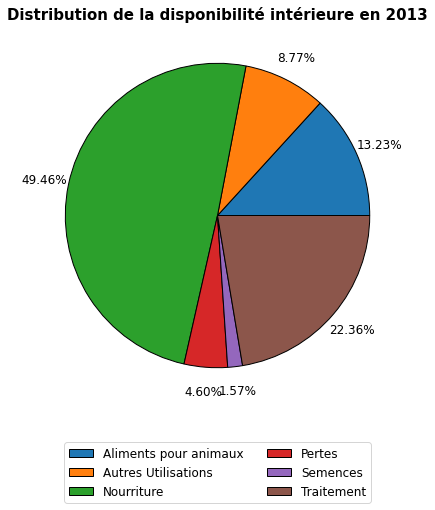

In [493]:
plt.figure(figsize =(7,7))
plt.pie(x = dispo_alim_graph['value'], autopct = '%.2f%%', pctdistance = 1.16, 
        wedgeprops={'linewidth': 1.0,'edgecolor':'black'}, textprops={'fontsize': 12})
plt.title("Distribution de la disponibilité intérieure en 2013", fontsize = 15, fontweight = 'bold')
plt.legend(labels=dispo_alim_graph['variable'], loc='upper center', 
           bbox_to_anchor=(0.5, -0.08), ncol=2, fontsize = 12)
plt.show()

### Utilisation de la disponibilité intérieure des céréales

Selon Julien, il y a des chiffres intéressants sur l’utilisation des céréales,
notamment la répartition entre l’alimentation humaine et l’alimentation pour animaux. 

La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien des données du site FAO.

Regardons de plus près ces pourcentages pour chaque type de produit de la catégorie "Céréales" :

In [535]:
# Sommes d'alimentation animale et humaine par type de produit

dispo_groupe_alim = dispo_alim_qte.groupby('Produit')[['Aliments pour animaux','Nourriture', 'Disponibilité intérieure']].sum().reset_index()
dispo_groupe_alim.head()

,Produit,Aliments pour animaux,Nourriture,Disponibilité intérieure
0,Abats Comestible,1009.0,15669.0,17587.0
1,"Agrumes, Autres",0.0,11359.0,12176.0
2,"Alcool, non Comestible",0.0,0.0,21741.0
3,Aliments pour enfants,0.0,761.0,84.0
4,Ananas,0.0,20757.0,23282.0


In [536]:
# Catégorie "Céréales"

dispo_groupe_cereales = dispo_groupe_alim.loc[(dispo_groupe_alim['Produit']=='Blé') |
                                                (dispo_groupe_alim['Produit']=='Riz (Eq Blanchi)') |
                                                (dispo_groupe_alim['Produit']=='Orge') |
                                                (dispo_groupe_alim['Produit']=='Maïs') |
                                                (dispo_groupe_alim['Produit']=='Seigle') |
                                                (dispo_groupe_alim['Produit']=='Millet') |
                                                (dispo_groupe_alim['Produit']=='Sorgho') |
                                                (dispo_groupe_alim['Produit']=='Avoine') |
                                                (dispo_groupe_alim['Produit']=='Céréales, Autres'), :]
dispo_groupe_cereales.head(9)

,Produit,Aliments pour animaux,Nourriture,Disponibilité intérieure
7,Avoine,16251.0,3903.0,23407.0
12,Blé,129668.0,457824.0,679498.0
21,"Céréales, Autres",19035.0,5324.0,27485.0
52,Maïs,546116.0,125184.0,955799.0
54,Millet,3306.0,23040.0,29911.0
62,Orge,92658.0,6794.0,140439.0
79,Riz (Eq Blanchi),33594.0,377286.0,475656.0
80,Seigle,8099.0,5502.0,16567.0
82,Sorgho,24808.0,24153.0,58237.0


In [538]:
# Porcentages alimentation animale et alimentation humaine pour la catégorie Produits céréales 

p_anim_cereale = round(dispo_groupe_cereales['Aliments pour animaux'].sum()*100/dispo_groupe_cereales['Disponibilité intérieure'].sum(),2)
print ("Pourcentage d'alimentation animale des produits céréales = ", p_anim_cereale)
p_hum_cereale = round(dispo_groupe_cereales['Nourriture'].sum()*100/dispo_groupe_cereales['Disponibilité intérieure'].sum(),2)
print ("Pourcentage d'alimentation humaine des produits céréales = ", p_hum_cereale)

Pourcentage d'alimentation animale des produits céréales =  36.29
Pourcentage d'alimentation humaine des produits céréales =  42.75


### L'utilisation des disponibilités intérieures de la catégorie céréales en 2013 est de 42.75% pour l'alimentation humaine et 36.29% pour l'alimentation animale.

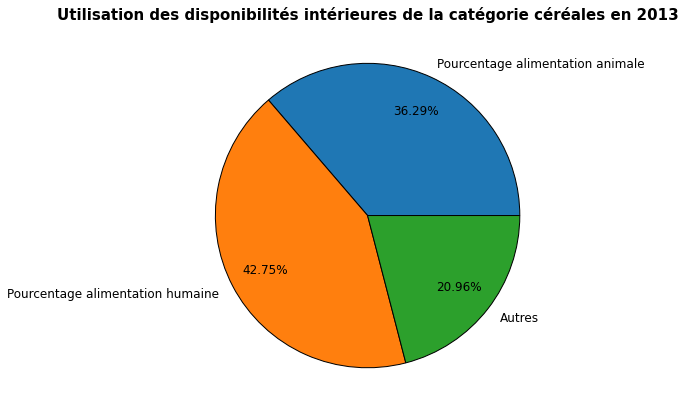

In [539]:
cer_prop = [36.29, 42.75, 20.96]
cer_label = ['Pourcentage alimentation animale', 'Pourcentage alimentation humaine', 'Autres']
plt.figure(figsize = (7,7))
plt.pie(cer_prop, labels = cer_label, autopct = '%.2f%%', pctdistance = 0.76, 
        wedgeprops={'linewidth': 1.0,'edgecolor':'black'}, textprops={'fontsize': 12})
plt.title("Utilisation des disponibilités intérieures de la catégorie céréales en 2013", fontweight = 'bold', fontsize = 15)
plt.show()

### Utilisation de la disponibilité intérieure du manioc en Thaïlande

Julien avait mencioné un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. 

On regarde la proportion de personnes en état de sous nutrition en Thaïlande  :

In [136]:
# Sous nutrition en Thaïlande
p_thai = pop_sous_nut_2017.loc[pop_sous_nut_2017['Zone']=='Thaïlande',:]
p_thai

,Zone,Année,Population,Sous_nutrition,Proportion_sous_nut
1114,Thaïlande,2017,69209810.0,6200000.0,8.96


In [137]:
print("La Thaïlande avait un total de", '{:,}'.format(p_thai['Population'].values[0]).replace(',', ' '), "personnes en 2017, dont", p_thai['Sous_nutrition'].values[0], "en état de sous_nutrition, soit", p_thai['Proportion_sous_nut'].values[0], "% de la population.")

La Thaïlande avait un total de 69 209 810.0 personnes en 2017, dont 6200000.0 en état de sous_nutrition, soit 8.96 % de la population.


Et on regarde les données de sa disponibilité alimentaire pour le produit manioc :

In [121]:
# Disponibilité alimentaire du manioc en Thaïlande
manioc_thailande = dispo_alim_qte.loc[(dispo_alim_qte['Zone']=='Thaïlande')&(dispo_alim_qte['Produit']=='Manioc'),:]
manioc_thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Pourcentage alimentation animale,Pourcentage perdue,Pourcentage alimentation humaine
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,28.74,24.12,13.9


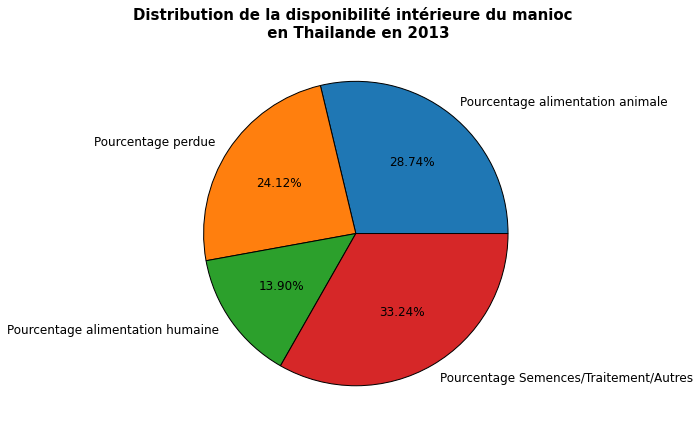

In [517]:
manioc_pct = [28.74, 24.12, 13.9, 33.24]
manioc_label = ['Pourcentage alimentation animale', 'Pourcentage perdue', 'Pourcentage alimentation humaine', 'Pourcentage Semences/Traitement/Autres']
plt.figure(figsize =(7,7))
plt.pie(x = manioc_pct, labels = manioc_label, autopct = '%.2f%%', 
        wedgeprops={'linewidth': 1.0,'edgecolor':'black'}, textprops={'fontsize': 12})
plt.title("Distribution de la disponibilité intérieure du manioc \n en Thailande en 2013", fontsize = 15, fontweight = 'bold')
plt.show()

On peut noter un chiffre très important de la quantité exportée comparé à la production de ce produit. On calcule donc la proportion :

In [138]:
# proportion d'exportation de manioc par rapport à sa production en Thaïlande

prop_manioc_thai_exp = round(manioc_thailande['Exportations - Quantité']*100/manioc_thailande['Production'],2)
prop_manioc_thai_exp.values[0]

83.41

### La proportion d'exportation de manioc par rapport à sa production en Thaïlande est de 83.41%.

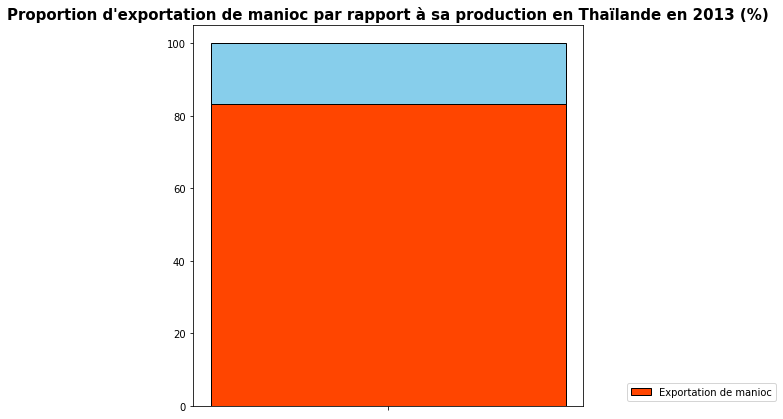

In [521]:
plt.figure(figsize = (7,7))
plt.bar(data_graph, 100, color = 'skyblue', edgecolor='black')
plt.bar(data_graph, 83.41, color = 'orangered', label = "Exportation de manioc", edgecolor='black')
plt.legend(loc="lower left",bbox_to_anchor=(1.1,0))
plt.title("Proportion d'exportation de manioc par rapport à sa production en Thaïlande en 2013 (%)", fontsize = 15, fontweight = 'bold')
plt.show()

# 2. Etude plus fine pour chacun des pays

## 2.1 Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [184]:
pop_sous_graph = pop_sous_nut_2017.sort_values('Proportion_sous_nut', ascending=False).head(10)
pop_sous_graph

,Zone,Année,Population,Sous_nutrition,Proportion_sous_nut
472,Haïti,2017,10982366.0,5300000.0,48.26
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
652,Madagascar,2017,25570512.0,10500000.0,41.06
622,Libéria,2017,4702226.0,1800000.0,38.28
604,Lesotho,2017,2091534.0,800000.0,38.25
1102,Tchad,2017,15016753.0,5700000.0,37.96
970,Rwanda,2017,11980961.0,4200000.0,35.06
730,Mozambique,2017,28649018.0,9400000.0,32.81
1120,Timor-Leste,2017,1243258.0,400000.0,32.17
4,Afghanistan,2017,36296113.0,10500000.0,28.93


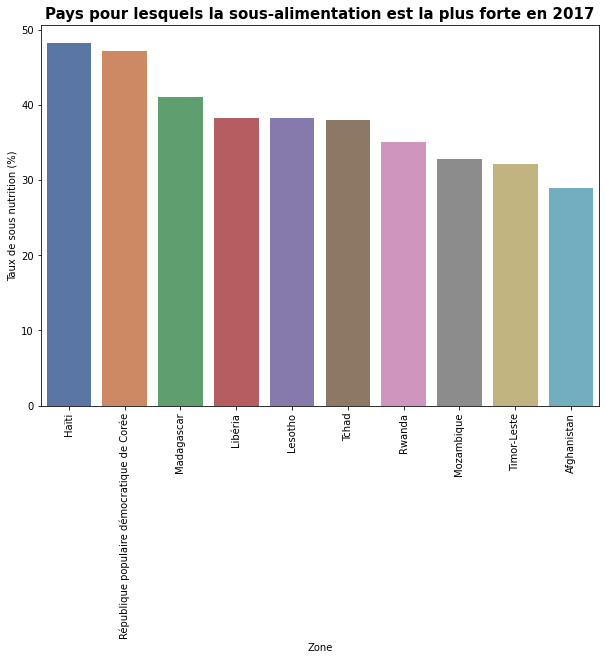

In [529]:
plt.figure(figsize = (10,7))
sns.barplot(y = pop_sous_graph['Proportion_sous_nut'], x = pop_sous_graph['Zone'], palette = 'deep')
plt.ylabel('Taux de sous nutrition (%)')
plt.xticks(rotation = 90)
plt.title("Pays pour lesquels la sous-alimentation est la plus forte en 2017", fontweight = 'bold', fontsize = 15)
plt.show()

## 2.2 Pays qui ont le plus bénéficié d’aide depuis 2013

In [473]:
# Somme des valeurs reçus en aide alimentaire par pays depuis 2013
aide_group = aide_alimentaire.groupby('Pays bénéficiaire')['Valeur'].sum().reset_index()
aide_group['Valeur'] = aide_group['Valeur']/1000000
aide_group.rename(columns={'Valeur':'Somme (tonnes)'}, inplace = True)

# Proportion des aides pour chaque pays
aide_group['Proportion des aides'] = aide_group['Somme (tonnes)']*100/aide_group['Somme (tonnes)'].sum()

#Classement des 5 pays qui ont reçu les plus de bénéfices d'aide
aide_graph = aide_group.sort_values('Proportion des aides', ascending=False).head()
aide_graph

,Pays bénéficiaire,Somme (tonnes),Proportion des aides
50,République arabe syrienne,1.858943,16.844506
75,Éthiopie,1.381294,12.516368
70,Yémen,1.206484,10.932356
61,Soudan du Sud,0.695248,6.299875
60,Soudan,0.669784,6.069137


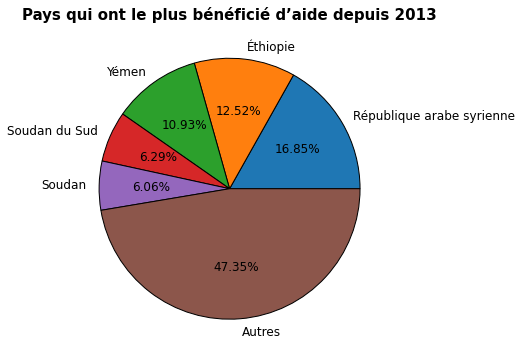

In [480]:
c = aide_graph['Proportion des aides'].sum()
d = 100 - c
d

plt.figure(figsize = (6,6))
proport_aides = [16.84,12.51,10.93,6.29,6.06, 47.33]
labels_aides = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan', 'Autres']
plt.pie(x = proport_aides, labels = labels_aides, autopct = '%.2f%%', wedgeprops={'linewidth': 1.0,'edgecolor':'black'}, textprops={'fontsize': 12})
plt.title("Pays qui ont le plus bénéficié d’aide depuis 2013", fontweight = 'bold', fontsize = 15)
plt.show()

## 2.3 Pays ayant le plus/le moins de disponibilité/habitant

On travaillera avec la disponibilité alimentaire en kcal/personne/jour.

In [198]:
# Disponibilité intériéure totale par pays

dispo_inter_par_pays = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
dispo_inter_par_pays.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [199]:
# Disponibilité alimentaire + Population 2013

dispo_int_pop = pd.merge(pop_2013, dispo_inter_par_pays, on=['Zone'])
dispo_int_pop.head()

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2013,32269589.0,2087.0
1,Afrique du Sud,2013,53687121.0,3020.0
2,Albanie,2013,2903790.0,3188.0
3,Algérie,2013,38140133.0,3293.0
4,Allemagne,2013,81174367.0,3503.0


Les 10 pays ayant le plus de disponibilité par habitant :

In [202]:
top_10_dispo = dispo_int_pop.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
top_10_dispo

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2013,8556189.0,3770.0
17,Belgique,2013,11154009.0,3737.0
163,Turquie,2013,75925462.0,3708.0
54,États-Unis d'Amérique,2013,316400538.0,3682.0
80,Israël,2013,7734841.0,3610.0
78,Irlande,2013,4615422.0,3602.0
81,Italie,2013,60166830.0,3578.0
95,Luxembourg,2013,542560.0,3540.0
47,Égypte,2013,88404646.0,3518.0
4,Allemagne,2013,81174367.0,3503.0


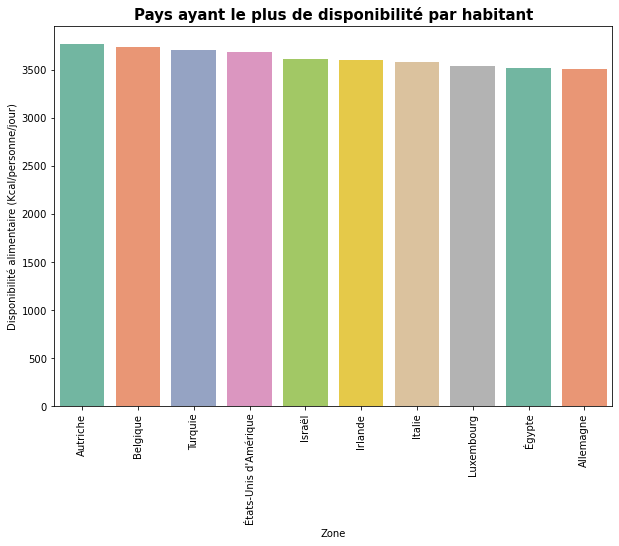

In [530]:
plt.figure(figsize=(10,7))
sns.barplot(x= top_10_dispo['Zone'], y = top_10_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], palette='Set2')
plt.xticks(rotation = 90)
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.title("Pays ayant le plus de disponibilité par habitant", fontweight = 'bold', fontsize = 15)
plt.show()

Les 10 pays ayant le le moins de disponibilité par habitant :

In [229]:
pire_10_dispo = dispo_int_pop.sort_values('Disponibilité alimentaire (Kcal/personne/jour)').head(10)
pire_10_dispo

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
131,République centrafricaine,2013,4447944.0,1879.0
170,Zambie,2013,14926544.0,1924.0
97,Madagascar,2013,22961255.0,2056.0
0,Afghanistan,2013,32269589.0,2087.0
70,Haïti,2013,10400675.0,2089.0
136,République populaire démocratique de Corée,2013,24929497.0,2093.0
156,Tchad,2013,13220433.0,2109.0
171,Zimbabwe,2013,13350373.0,2113.0
120,Ouganda,2013,35694519.0,2126.0
55,Éthiopie,2013,95385798.0,2129.0


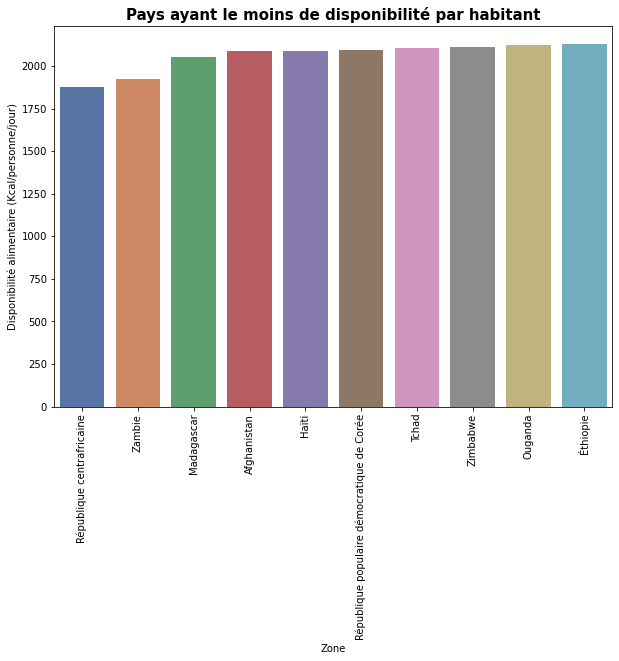

In [531]:
plt.figure(figsize = (10,7))
sns.barplot(x = pire_10_dispo['Zone'], y = pire_10_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], palette = 'deep')
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.xticks(rotation = 90)
plt.title("Pays ayant le moins de disponibilité par habitant", fontweight = 'bold', fontsize = 15)
plt.show()